In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.1 MB/s  0:00:02eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 11.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.0 MB/s  0:00:00 eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.0 MB/s  0:00:00 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.7 MB/s  0:00:00 eta 0:00:01
Usi

In [3]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
csv_path = "Dataset/placementdata.csv"
df = pd.read_csv(csv_path)

df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [6]:
df.drop("StudentID", axis=1, inplace=True)

In [7]:
FEATURE_COLUMNS = [
    "CGPA",
    "Internships",
    "Projects",
    "Workshops/Certifications",
    "AptitudeTestScore",
    "SoftSkillsRating",
    "ExtracurricularActivities",
    "PlacementTraining",
    "SSC_Marks",
    "HSC_Marks"
]

TARGET_COLUMN = "PlacementStatus"

In [8]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

df.fillna(0, inplace=True)

In [9]:
X = df[FEATURE_COLUMNS]
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

accuracies = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)

    accuracies[name] = acc
    trained_models[name] = model

    print(f"{name}: {acc*100:.2f}%")

Logistic Regression: 79.37%
Decision Tree: 71.03%
Random Forest: 77.60%
Gradient Boosting: 79.00%
SVM: 78.90%
KNN: 76.60%


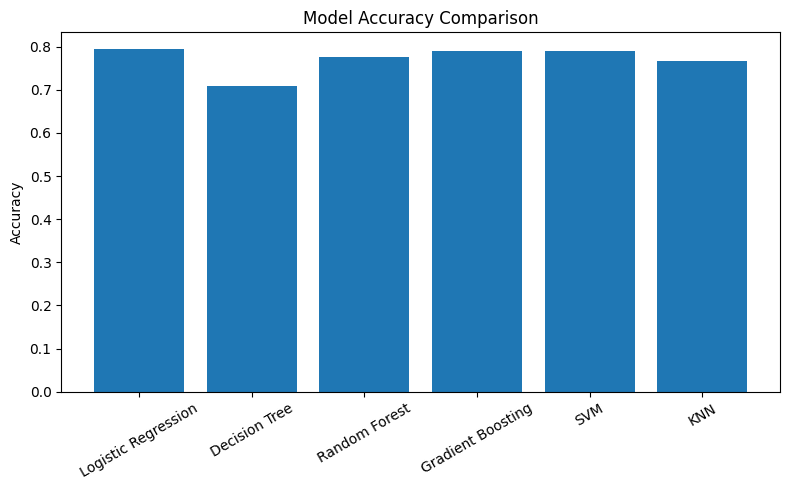

In [12]:
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values())
plt.xticks(rotation=30)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()

In [13]:
best_model_name = max(accuracies, key=accuracies.get)
best_model = trained_models[best_model_name]

print("Best Model:", best_model_name)
print(f"Best Accuracy: {accuracies[best_model_name]*100:.2f}%")

Best Model: Logistic Regression
Best Accuracy: 79.37%


In [14]:
rf_model = trained_models["Random Forest"]

importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": FEATURE_COLUMNS,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df

,Feature,Importance
9,HSC_Marks,0.200645
4,AptitudeTestScore,0.175006
8,SSC_Marks,0.134320
0,CGPA,0.116830
5,SoftSkillsRating,0.092209
2,Projects,0.089115
6,ExtracurricularActivities,0.071641
3,Workshops/Certifications,0.061949
1,Internships,0.033648
7,PlacementTraining,0.024635


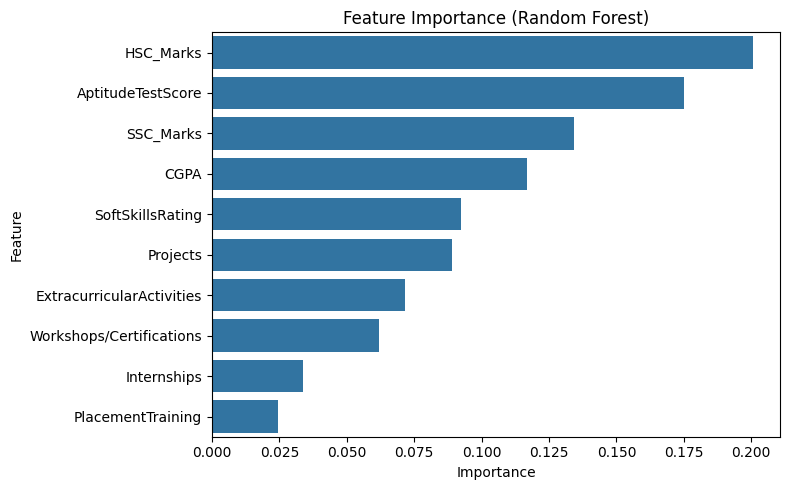

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df
)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [16]:
top_features = feature_importance_df["Feature"].head(2).tolist()
top_features

['HSC_Marks', 'AptitudeTestScore']

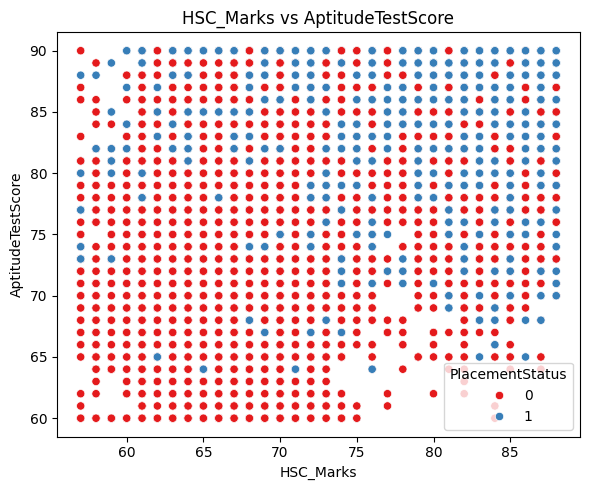

In [17]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df[top_features[0]],
    y=df[top_features[1]],
    hue=df[TARGET_COLUMN],
    palette="Set1"
)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f"{top_features[0]} vs {top_features[1]}")
plt.tight_layout()
plt.show()

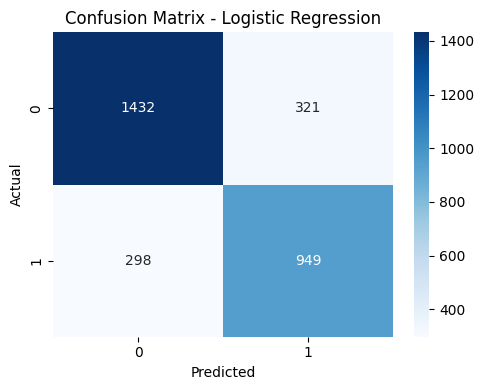

In [18]:
cm = confusion_matrix(
    y_test,
    best_model.predict(X_test_scaled)
)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [22]:
os.makedirs("model", exist_ok=True)

joblib.dump(best_model, "model/placement_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(FEATURE_COLUMNS, "model/feature_columns.pkl")

['model/feature_columns.pkl']